In [4]:
!pip install numpy scikit-fuzzy matplotlib

Available Outputs: {'Wash Time': 19.0, 'Water Temperature': 36.66666666666667, 'Spin Speed': 450.0000000000004}
Wash Time: 19.0 minutes
Water Temperature: 36.66666666666667 °C
Spin Speed: 450.0000000000004 rpm


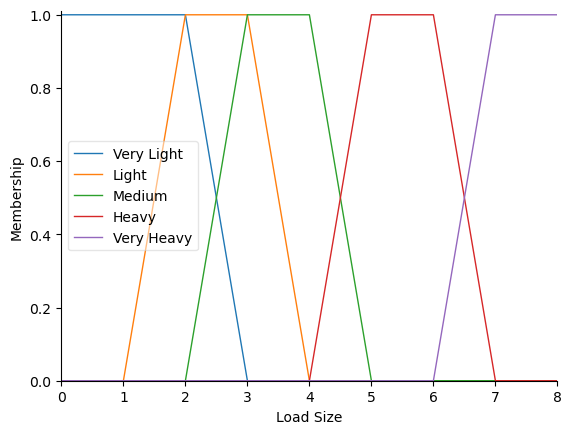

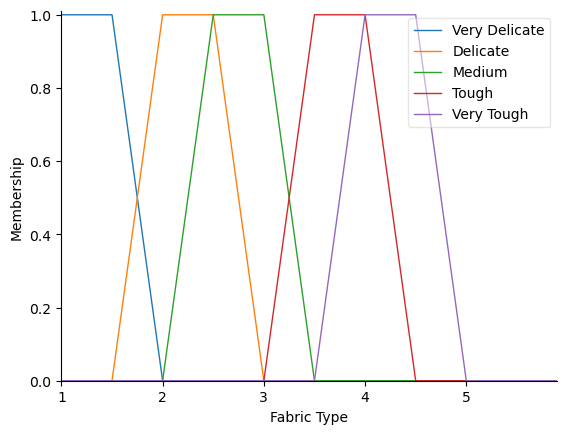

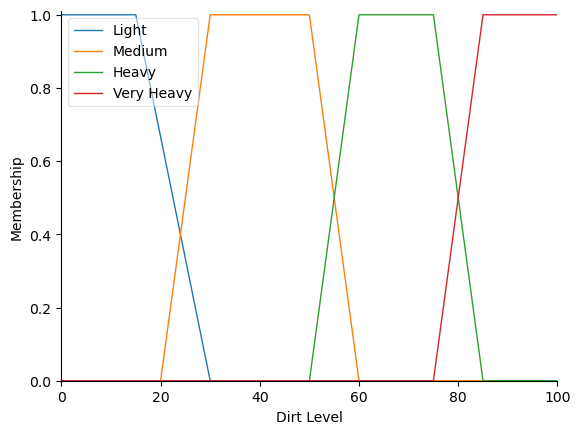

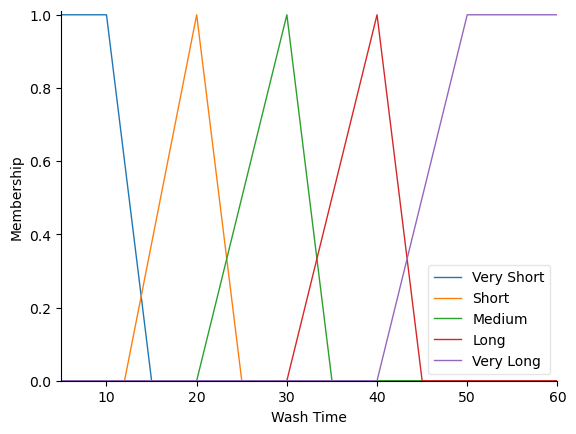

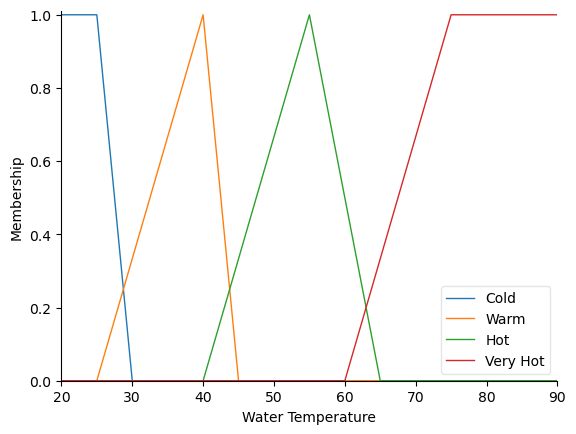

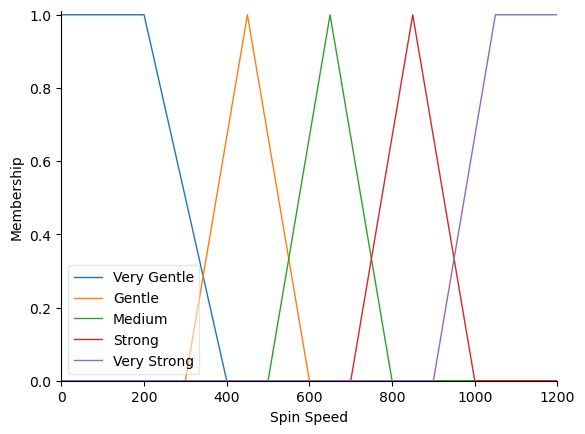

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define input variables
load_size = ctrl.Antecedent(np.arange(0, 9, 1), 'Load Size')  # 0 to 8 kg
fabric_type = ctrl.Antecedent(np.arange(1, 6, 0.1), 'Fabric Type')  # 1 to 5
dirt_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Dirt Level')  # 0% to 100%

# Define output variables
wash_time = ctrl.Consequent(np.arange(5, 61, 1), 'Wash Time')  # 5 to 60 minutes
water_temperature = ctrl.Consequent(np.arange(20, 91, 1), 'Water Temperature')  # 20°C to 90°C
spin_speed = ctrl.Consequent(np.arange(0, 1201, 1), 'Spin Speed')  # 0 to 1200 rpm

# Membership functions for Load Size
load_size['Very Light'] = fuzz.trapmf(load_size.universe, [0, 0, 2, 2])    # Triangular (0,2)
load_size['Light'] = fuzz.trapmf(load_size.universe, [1.5, 2, 3, 3.5])      # Trapezoidal (1.5,2,3,3.5)
load_size['Medium'] = fuzz.trapmf(load_size.universe, [2, 3, 4, 5])     # Trapezoidal (3,3.5,4.5,5)
load_size['Heavy'] = fuzz.trapmf(load_size.universe, [4.5, 5, 6, 6.5])      # Trapezoidal (4.5,5,6,6.5)
load_size['Very Heavy'] = fuzz.trapmf(load_size.universe, [6, 6.5, 8, 8])    # Trapezoidal (6,6.5,8)

# Membership functions for Fabric Type
fabric_type['Very Delicate'] = fuzz.trapmf(fabric_type.universe,[0,1,1.5,2])   # Triangular (1,2)
fabric_type['Delicate'] = fuzz.trapmf(fabric_type.universe,[1.5,2,2.5,3])    # Trapezoidal (1.5,2,2.5,3)
fabric_type['Medium'] = fuzz.trapmf(fabric_type.universe,[2,2.5,3,3.5])      # Trapezoidal (2,2.5,3,3.5)
fabric_type['Tough'] = fuzz.trapmf(fabric_type.universe,[3,3.5,4,4.5])       # Trapezoidal (3,3.5,4,4.5)
fabric_type['Very Tough'] = fuzz.trapmf(fabric_type.universe,[3.5 ,4 ,4.5 ,5])   # Trapezoidal (3.5 ,4 ,4.5 ,5)

# Membership functions for Dirt Level
dirt_level['Light'] = fuzz.trapmf(dirt_level.universe,[0,0 ,15 ,30])           # Triangular (0-30)
dirt_level['Medium'] = fuzz.trapmf(dirt_level.universe,[20 ,30 ,50 ,60])     # Trapezoidal (20-30-50-60)
dirt_level['Heavy'] = fuzz.trapmf(dirt_level.universe,[50 ,60 ,75 ,85])      # Trapezoidal (50-60-75-85)
dirt_level['Very Heavy'] = fuzz.trapmf(dirt_level.universe,[75 ,85 ,100 ,100])# Trapezoidal (75-85-100)

# Membership functions for Wash Time
wash_time['Very Short'] = fuzz.trapmf(wash_time.universe,[0,5 ,10 ,15])
wash_time['Short'] = fuzz.trimf(wash_time.universe,[12 ,20 ,25])
wash_time['Medium'] = fuzz.trimf(wash_time.universe,[20 ,30 ,35])
wash_time['Long'] = fuzz.trimf(wash_time.universe,[30 ,40 ,45])
wash_time['Very Long'] = fuzz.trapmf(wash_time.universe,[40 ,50 ,60, 60])

# Membership functions for Water Temperature
water_temperature['Cold'] = fuzz.trapmf(water_temperature.universe,[20 ,20 ,25 ,30])
water_temperature['Warm'] = fuzz.trimf(water_temperature.universe,[25 ,40 ,45])
water_temperature['Hot'] = fuzz.trimf(water_temperature.universe,[40 ,55 ,65])
water_temperature['Very Hot'] = fuzz.trapmf(water_temperature.universe,[60 ,75 ,90, 90])

# Membership functions for Spin Speed
spin_speed['Very Gentle'] = fuzz.trapmf(spin_speed.universe,[0, 0,200 ,400])
spin_speed['Gentle'] = fuzz.trimf(spin_speed.universe,[300 ,450 ,600])
spin_speed['Medium'] = fuzz.trimf(spin_speed.universe,[500 ,650 ,800])
spin_speed['Strong'] = fuzz.trimf(spin_speed.universe,[700 ,850 ,1000])
spin_speed['Very Strong'] = fuzz.trapmf(spin_speed.universe,[900 ,1050 ,1200, 1200])

# Define rules
rule1 = ctrl.Rule(load_size['Very Light'] & fabric_type['Very Delicate'] & dirt_level['Light'],
                  (wash_time['Very Short'], water_temperature['Cold'], spin_speed['Very Gentle']))
rule2 = ctrl.Rule(load_size['Light'] & fabric_type['Delicate'] & dirt_level['Medium'],
                  (wash_time['Short'], water_temperature['Warm'], spin_speed['Gentle']))
rule3 = ctrl.Rule(load_size['Medium'] & fabric_type['Medium'] & dirt_level['Heavy'],
                  (wash_time['Medium'], water_temperature['Hot'], spin_speed['Medium']))
rule4 = ctrl.Rule(load_size['Heavy'] & fabric_type['Tough'] & dirt_level['Very Heavy'],
                  (wash_time['Long'], water_temperature['Hot'], spin_speed['Strong']))
rule5 = ctrl.Rule(load_size['Very Heavy'] & fabric_type['Very Tough'] & dirt_level['Heavy'],
                  (wash_time['Very Long'], water_temperature['Very Hot'], spin_speed['Very Strong']))

# Create control system and simulation
washing_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
washing_simulation = ctrl.ControlSystemSimulation(washing_control_system)

# Test the system with sample inputs
washing_simulation.input['Load Size'] = 2.2
washing_simulation.input['Fabric Type'] = 2
washing_simulation.input['Dirt Level'] =  30   

# Compute the result
washing_simulation.compute()

# Check available outputs after computation
print("Available Outputs:", washing_simulation.output)

# Output results if they exist
if 'Wash Time' in washing_simulation.output:
    print(f"Wash Time: {washing_simulation.output['Wash Time']} minutes")
else:
    print("Wash Time output not found.")

if 'Water Temperature' in washing_simulation.output:
    print(f"Water Temperature: {washing_simulation.output['Water Temperature']} °C")
else:
    print("Water Temperature output not found.")

if 'Spin Speed' in washing_simulation.output:
    print(f"Spin Speed: {washing_simulation.output['Spin Speed']} rpm")
else:
    print("Spin Speed output not found.")

# Visualize results if needed (optional)
load_size.view()
fabric_type.view()
dirt_level.view()
wash_time.view()
water_temperature.view()
spin_speed.view()
